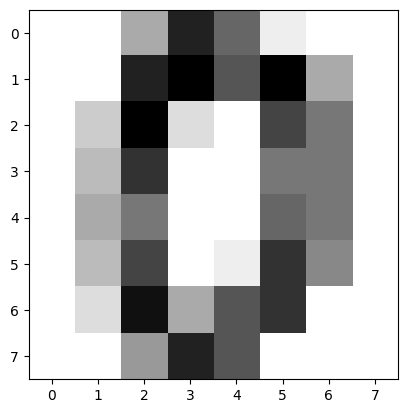

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation = 'nearest')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

import pandas as pd
import numpy as np

In [5]:
n_samples = len(digits.images)

In [7]:
data = digits.images.reshape((n_samples, -1))


In [8]:

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [13]:
Y = pd.get_dummies(digits.target).values

In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)

In [15]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 자동 적용
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot 레이블이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [17]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2463 - loss: 2.1892 - val_accuracy: 0.7431 - val_loss: 1.1587
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 1.0553 - val_accuracy: 0.8785 - val_loss: 0.5439
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8290 - loss: 0.6349 - val_accuracy: 0.9132 - val_loss: 0.3532
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8809 - loss: 0.4635 - val_accuracy: 0.9236 - val_loss: 0.2590
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8829 - loss: 0.3603 - val_accuracy: 0.9340 - val_loss: 0.2074
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9129 - loss: 0.2977 - val_accuracy: 0.9479 - val_loss: 0.1739
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9339 - loss: 0.2377 - val_accuracy: 0.9514 - val_loss: 0.1468
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9359 - loss: 0.1919 - val_accuracy: 0.9618 - val_loss:

In [18]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [19]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


In [20]:

print("\n분류 성능 보고서:")
print(classification_report(y_test_class, y_pred_class))
print("\n혼동 행렬:")
print(confusion_matrix(y_test_class, y_pred_class))


분류 성능 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        36
           3       0.94      1.00      0.97        29
           4       0.94      0.97      0.95        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.95      0.95      0.95        39
           8       0.97      0.92      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


혼동 행렬:
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43 

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

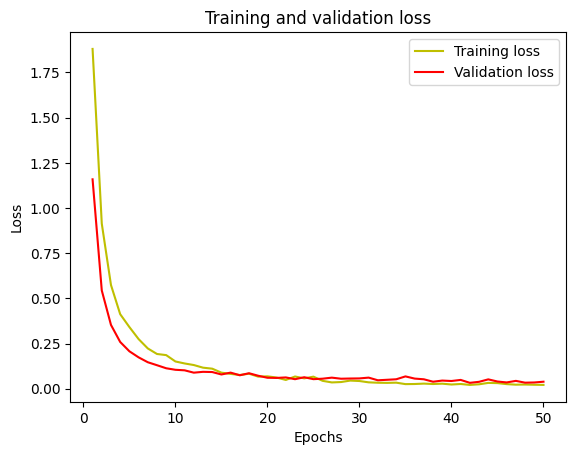

In [22]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

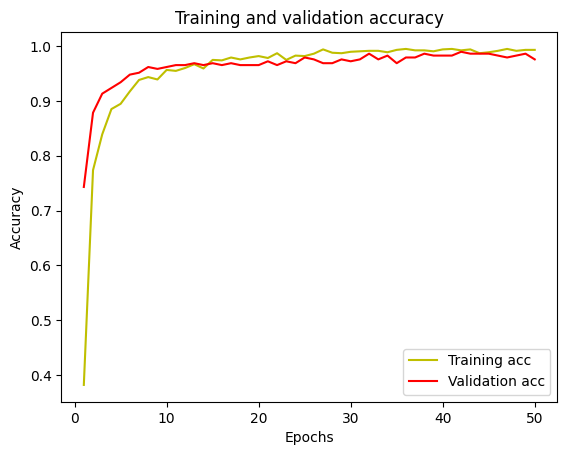

In [23]:

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        36
           3       0.94      1.00      0.97        29
           4       0.94      0.97      0.95        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.95      0.95      0.95        39
           8       0.97      0.92      0.95        39
           9       0.97      0.95      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0